<a href="https://colab.research.google.com/github/Dias04404/sistemas-energia-eolica/blob/main/Atividade_01_Caico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 01 Eólica

Este repositório será destinado a realização das Atividades da Disciplina de Sistemas Eólicos 2025.1

| REGIÃO: | NE |
| --- | --- |
| UF: | RN |
| ESTAÇÃO: | CAICÓ |
| CODIGO (WMO): | A316 |
| LATITUDE: | -6,6749999 |
| LONGITUDE: | -37,8499999 |
| ALTITUDE: | 171,26 |
| DATA DE FUNDAC?O: | 07/01/07 |

## Tarefa 01

Cada aluno vai gravar um vídeo e explicar, apresentando slide, sobre o capitulo 2 do livro ***“Energia Eólica para Produção de Energia Elétrica”***, Ronaldo dosSantos Custódio, Synergia Editora, 2º edição.

## Tarefa 02

Alunos montar uma tabela e/ou gráfico em função da Equação (7), representada abaixo

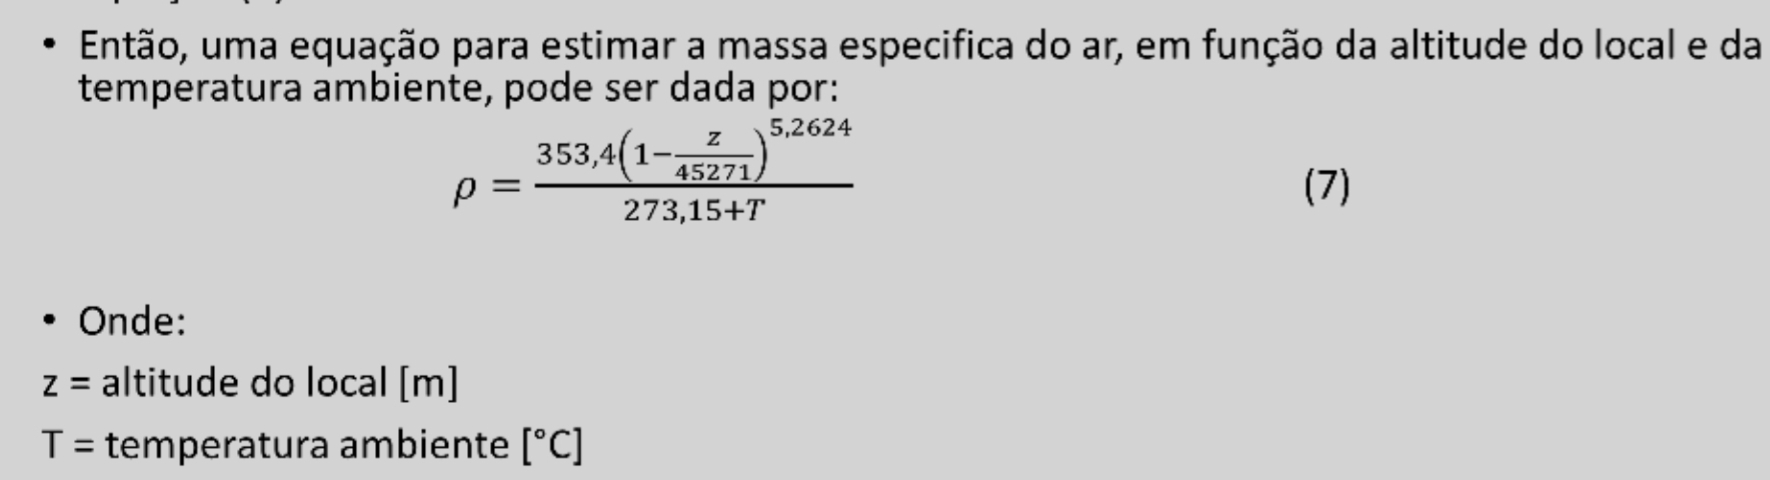

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore') # Ignora warnings no github

In [2]:
#### TABELA ####

# VARIAÇÃO DA ALTITUDE
altitudes = np.arange(0, 1001, 100) # PASSO 100m

# VARIAÇÃO DA TEMPERATURA
temperaturas = np.arange(-5, 26, 5) # PASSO DE 5°C

tabela = pd.DataFrame(index=altitudes, columns=temperaturas) # CRIA TABELA

# Calcula a densidade para cada combinação de altitude e temperatura
for z in altitudes:
    for T in temperaturas:
        rho = (353.4 * (1 - (z / 45271))**5.2624) / (273.15 + T)
        tabela.at[z, T] = round(rho, 4)  # arredondando

tabela.index.name = 'Altitude (m)'       # LINHAS
tabela.columns.name = 'Temperatura (°C)' # COLUNAS


print(tabela) # EXIBE A TABELA

Temperatura (°C)     -5       0       5       10      15      20      25
Altitude (m)                                                            
0                 1.3179  1.2938  1.2705  1.2481  1.2264  1.2055  1.1853
100               1.3027  1.2788  1.2558  1.2337  1.2123  1.1916  1.1716
200               1.2876   1.264  1.2413  1.2194  1.1982  1.1778   1.158
300               1.2726  1.2493  1.2269  1.2052  1.1843  1.1641  1.1446
400               1.2578  1.2348  1.2126  1.1912  1.1705  1.1505  1.1312
500               1.2431  1.2203  1.1984  1.1772  1.1568  1.1371   1.118
600               1.2286  1.2061  1.1844  1.1635  1.1433  1.1238  1.1049
700               1.2142  1.1919  1.1705  1.1498  1.1299  1.1106   1.092
800               1.1999  1.1779  1.1568  1.1363  1.1166  1.0976  1.0792
900               1.1858  1.1641  1.1431  1.1229  1.1035  1.0846  1.0664
1000              1.1718  1.1503  1.1296  1.1097  1.0904  1.0718  1.0539


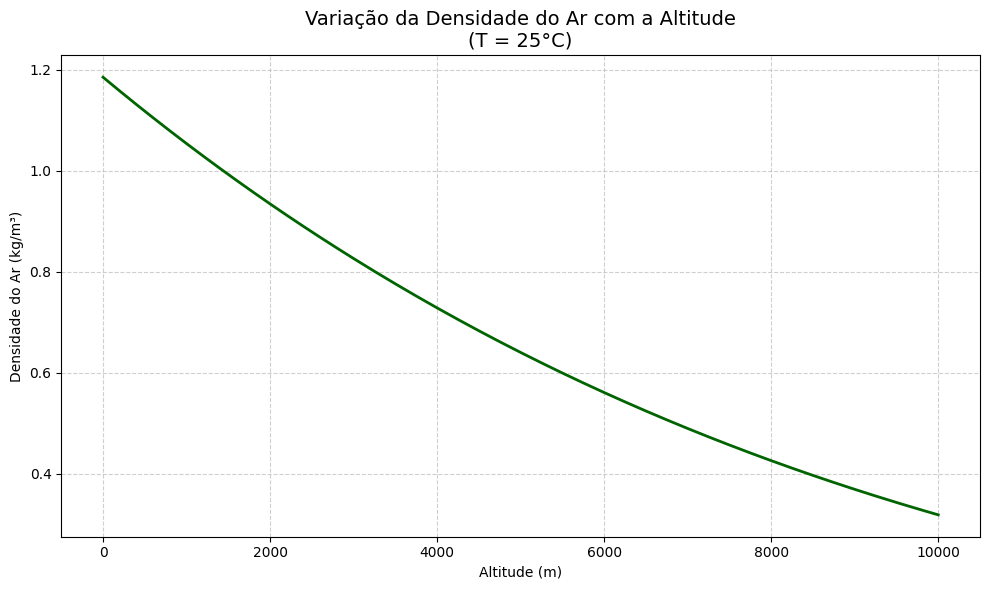

In [3]:
#### EM FUNÇÃO DE Z COM T CONSTANTE ####

# Altitude variando de 0 até 10.000 m com passo de 50 m
z = np.arange(0, 10001, 50)

# Equação (7): densidade do ar
rho = (353.4 * (1 - (z/ 45271))**5.2624) / (273.15 + T)

# Criar DataFrame para visualização
df_z = pd.DataFrame({
    'Altitude (m)': z,
    'Densidade do Ar (kg/m³)': rho
})

# ---------- PLOTAGEM ----------
plt.figure(figsize=(10, 6))
plt.plot(z, rho, color='darkgreen', linewidth=2)
plt.title('Variação da Densidade do Ar com a Altitude\n(T = 25°C)', fontsize=14)
plt.xlabel('Altitude (m)')
plt.ylabel('Densidade do Ar (kg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


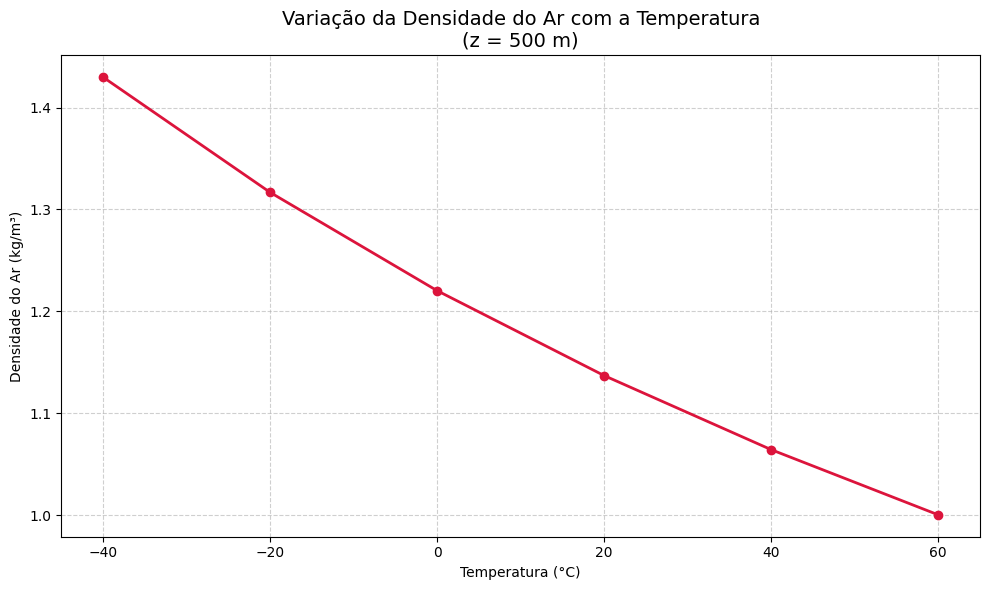

In [4]:
#### EM FUNÇÃO DE T COM Z CONSTANTE ####
# Altitude constante
z = 500  # metros

# Temperaturas variando de -40°C até 60°C com passo de 20°C
T = np.arange(-40, 61, 20)

# Equação (7): densidade do ar
rho = (353.4 * (1 - (z / 45271))**5.2624) / (273.15 + T)

# Criar DataFrame
df_T = pd.DataFrame({
    'Temperatura (°C)': T,
    'Densidade do Ar (kg/m³)': rho
})

# ---------- PLOTAGEM ----------
plt.figure(figsize=(10, 6))
plt.plot(T, rho, marker='o', color='crimson', linewidth=2)
plt.title(f'Variação da Densidade do Ar com a Temperatura\n(z = {z} m)', fontsize=14)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidade do Ar (kg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Tarefa 03

In [13]:
#### IMPORTAR BIBLIOTECAS ####
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORTAR DADOS ####
from google.colab import drive
drive.mount('/content/drive')
pasta = '/content/drive/MyDrive/eolica/caico' # DEFINIR PASTA COM OS CSVs

#### CRIA LISTAS ####
arquivos = [f for f in os.listdir(pasta) if f.lower().endswith('.csv')]
lista_df = [] # LISTA COM DATAFRAMES
colunas_remover = [ # LISTA COM COLUNAS PARA REMOVER
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Unnamed: 19',
    'Hora UTC', ''  # caso apareça
]

#### PREPARAÇÃO DOS CASOS ESPECIAIS ####
def ler_arquivo_inmet(caminho): # FUNÇÃO PARA LER E NORMALIZAR ARQUIVOS A PARTIR DE 2019
    with open(caminho, 'r', encoding='latin1') as f:  # CODIFICA PARA LEITURA DOS ARQUIVOS
        linhas = f.readlines()[8:]  # PULA OS METADADOS
        linhas = [linha.strip() for linha in linhas if linha.strip()]
    dados = [linha.split(';') for linha in linhas]  # CONVERTE O SEPARADOR DE COLUNAS
    df = pd.DataFrame(dados)
    colunas = df.iloc[0]  # TRANSFORMA A PRIMEIRA LINHA EM NOME DAS COLUNAS
    df = df[1:]  # REMOVE A PRIMEIRA LINHA DO DF
    df.columns = colunas
    df = df.loc[:, ~df.columns.duplicated()]
    df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)  # REMOVE LISTA DE COLUNAS
    return df

#### PROCESSAR ARQUIVOS ####
for arquivo in arquivos:
    caminho = os.path.join(pasta, arquivo)
    try:
        # VERIFICA SE O ARQUIVO É DE 2019 OU MAIS RECENTE
        if any(ano in arquivo for ano in ['2019', '2020', '2021', '2022', '2023', '2024']):
            df = ler_arquivo_inmet(caminho) # RODA A FUNÇÃO
        else:
            df = pd.read_csv(
                caminho,
                skiprows=8,
                encoding='latin1',
                sep=';',
                decimal=',',
                on_bad_lines='skip'
            )
            df = df.loc[:, ~df.columns.duplicated()]
            df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)

        # RENOMEIA A COLUNA DE DATA
        if 'DATA (YYYY-MM-DD)' in df.columns:
            df.rename(columns={'DATA (YYYY-MM-DD)': 'Data'}, inplace=True)
        # RENOMEIA A COLUNA DE VELOCIDADE
        if 'VENTO, VELOCIDADE HORARIA (m/s)' in df.columns:
            df.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
        # RENOMEIA A COLUNA DE VELOCIDADE MÁX
        if 'VENTO, RAJADA MAXIMA (m/s)' in df.columns:
            df.rename(columns={'VENTO, RAJADA MAXIMA (m/s)': 'VELOCIDADE MÁX (m/s)'}, inplace=True)

        # CONVERTE PARA DATETIME E CRIA COLUNAS ANO/MÊS/DIA
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

        df['Ano'] = df['Data'].dt.year
        df['Mês'] = df['Data'].dt.month
        df['Dia'] = df['Data'].dt.day

        # TRATA VALORES 9999 COMO NaN
        df.replace('-9999', pd.NA, inplace=True)
        df.replace('-9999.0', pd.NA, inplace=True)

        lista_df.append(df) # ADICIONA O DF A LISTA

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

#### CONCATENAR TODOS OS DATAFRAMES ####
df_final = pd.concat(lista_df, ignore_index=True)
caminho_saida = '/content/drive/MyDrive/eolica/dados_caico.csv'
df_final.to_csv(caminho_saida, index=False) # SALVAR COMO CSV FINAL

#### EXIBIR INFOS FINAIS ####
print("Colunas finais:", df_final.columns.tolist())
df_final

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colunas finais: ['Data', 'HORA (UTC)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VELOCIDADE MÁX (m/s)', 'VELOCIDADE (m/s)', 'Ano', 'Mês', 'Dia']


,Data,HORA (UTC),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",VELOCIDADE MÁX (m/s),VELOCIDADE (m/s),Ano,Mês,Dia
0,2015-01-01,00:00,127,8.7,4.6,2015,1,1
1,2015-01-01,01:00,107,7.9,3.2,2015,1,1
2,2015-01-01,02:00,90,8.4,3.2,2015,1,1
3,2015-01-01,03:00,90,8.2,3.0,2015,1,1
4,2015-01-01,04:00,109,9.0,3.3,2015,1,1
...,...,...,...,...,...,...,...,...
87667,2024-12-31,NaN,66,"6,6","2,9",2024,12,31
87668,2024-12-31,NaN,69,"8,3","2,1",2024,12,31
87669,2024-12-31,NaN,55,"5,9","2,6",2024,12,31
87670,2024-12-31,NaN,54,"6,8","2,7",2024,12,31


**Alguns Insights sobre o DataFrame:**

In [6]:
df_final.describe(include='all')

,Data,HORA (UTC),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",VELOCIDADE MÁX (m/s),VELOCIDADE (m/s),Ano,Mês,Dia
count,87672,35064,87672,87672,87672,87672.000000,87672.000000,87672.000000
unique,NaN,24,722,323,163,NaN,NaN,NaN
top,NaN,00:00,,,,NaN,NaN,NaN
freq,NaN,1461,18198,18483,18198,NaN,NaN,NaN
mean,2019-12-31 23:59:59.999999744,NaN,NaN,NaN,NaN,2019.500411,6.522310,15.731454
min,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,2015.000000,1.000000,1.000000
25%,2017-07-02 00:00:00,NaN,NaN,NaN,NaN,2017.000000,4.000000,8.000000
50%,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,2020.000000,7.000000,16.000000
75%,2022-07-02 00:00:00,NaN,NaN,NaN,NaN,2022.000000,10.000000,23.000000
max,2024-12-31 00:00:00,NaN,NaN,NaN,NaN,2024.000000,12.000000,31.000000


# Tarefa 3.1:

 Cada um vai escolher uma localidade e traçar o gráfico da média da velocidade do vento por ano, durante um período mínimode 10 anos, para mostrar a variação da velocidade média do vento durante anos

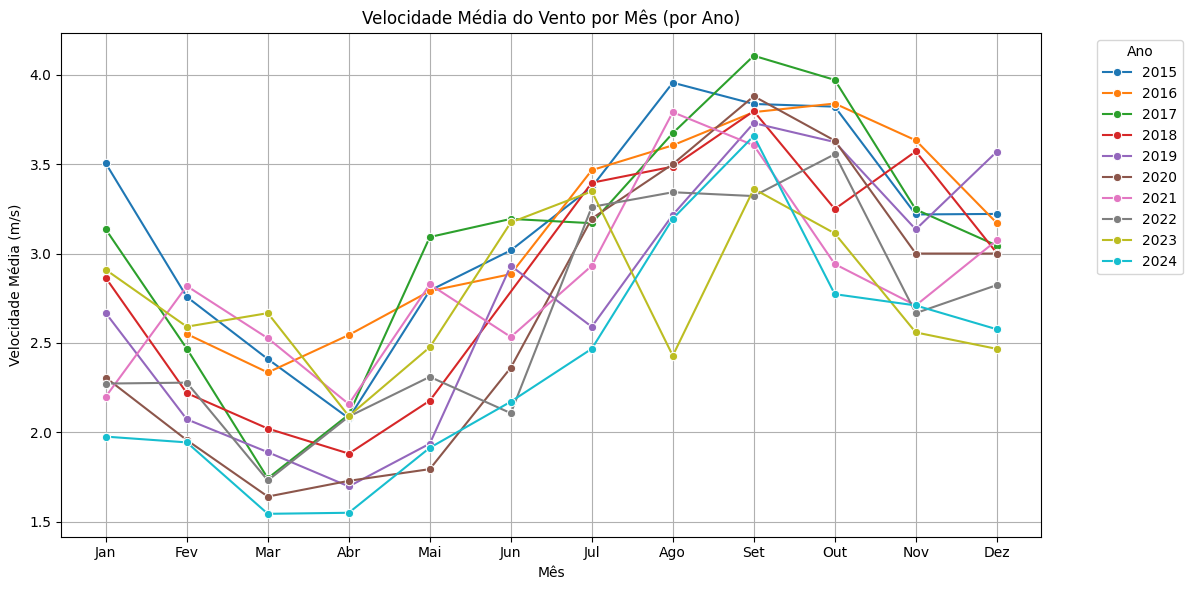

In [15]:
# Trocar -9999 por NaN e converter para numérico
df_final['VELOCIDADE (m/s)'] = pd.to_numeric(df_final['VELOCIDADE (m/s)'], errors='coerce') # Normaliza todos os valores para 3.1 ao invés de '3,1'
df_final['VELOCIDADE (m/s)'] = df_final['VELOCIDADE (m/s)'].replace(-9999, pd.NA) # Trata como valor faltante

# Calcular média mensal por ano
vmedia_mensal = df_final.groupby(['Ano', 'Mês'])['VELOCIDADE (m/s)'].mean().reset_index()

# Plotar gráfico de linha com múltiplas linhas (um por ano)
plt.figure(figsize=(12, 6))
sns.lineplot(data=vmedia_mensal, x='Mês', y='VELOCIDADE (m/s)', hue='Ano', palette='tab10', marker='o')

plt.title('Velocidade Média do Vento por Mês (por Ano)')
plt.xlabel('Mês')
plt.ylabel('Velocidade Média (m/s)')
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tarefa 3.2

Escolher 3 localidades e mostrar variações anuais durante dois períodos de registros, mostrando a variação sazonal do vento para períodos idênticos em diferentes locais.

**O período escolhido foi o ano de 2019 para as localizações a seguir:**
- Apodi (RN)
- Mossoró (RN)
- Caicó (RN)

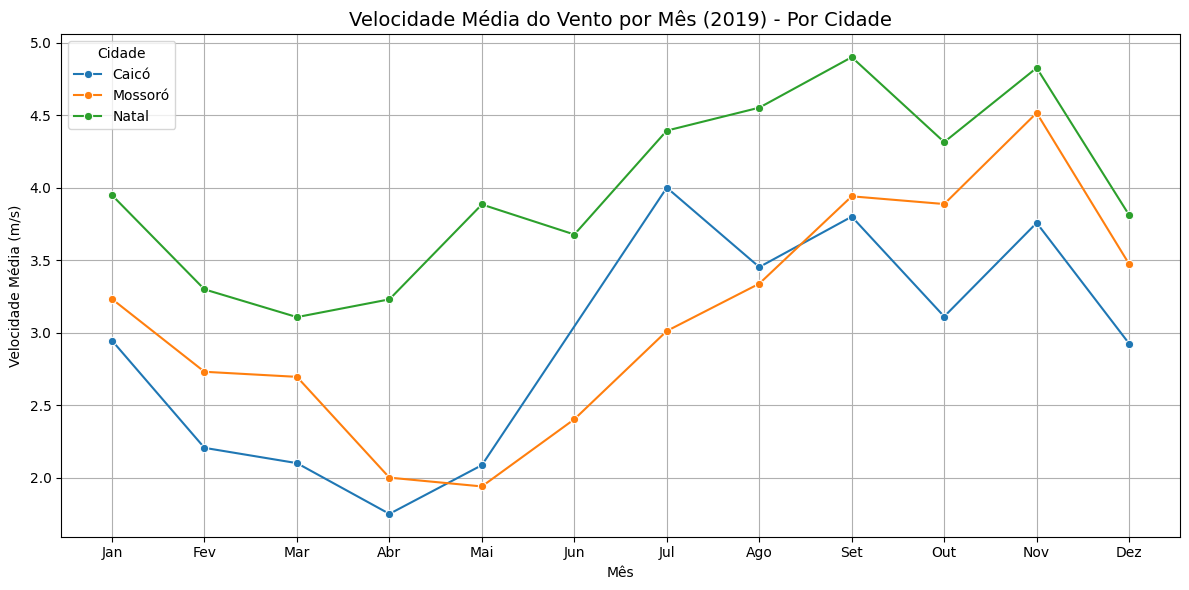

In [17]:
#### CRIA LISTAS ####
# IMPORTA CSV #
arquivos2 = [
    ('/content/drive/MyDrive/eolica/2019/INMET_NE_RN_A304_NATAL_01-01-2018_A_31-12-2018.CSV', 'Natal'),
    ('/content/drive/MyDrive/eolica/2019/INMET_NE_RN_A316_CAICO_01-01-2018_A_31-12-2018.CSV', 'Caicó'),
    ('/content/drive/MyDrive/eolica/2019/INMET_NE_RN_A318_MOSSORO_01-01-2018_A_31-12-2018.CSV', 'Mossoró'),
]


#### FUNÇÃO PARA LER ARQUIVOS INMET ####
def ler_arquivo_inmet2(caminho2):
    with open(caminho2, 'r', encoding='latin1') as f:
        linhas2 = f.readlines()[8:]
        linhas2 = [linha.strip() for linha in linhas2 if linha.strip()]
    dados2 = [linha.split(';') for linha in linhas2]
    df2 = pd.DataFrame(dados2)
    colunas2 = df2.iloc[0]
    df2 = df2[1:]
    df2.columns = colunas2
    df2 = df2.loc[:, ~df2.columns.duplicated()]
    df2.drop(columns=[col for col in colunas_remover if col in df2.columns], inplace=True)
    return df2

#### LÊ E PROCESSA CADA ARQUIVO ####
lista_df2 = []

for caminho2, cidade2 in arquivos2:
    try:
        df2 = ler_arquivo_inmet2(caminho2)

        if 'DATA (YYYY-MM-DD)' in df2.columns:
            df2.rename(columns={'DATA (YYYY-MM-DD)': 'Data'}, inplace=True)
        if 'VENTO, VELOCIDADE HORARIA (m/s)' in df2.columns:
            df2.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
        if 'VENTO, RAJADA MAXIMA (m/s)' in df2.columns:
            df2.rename(columns={'VENTO, RAJADA MAXIMA (m/s)': 'VELOCIDADE MÁX (m/s)'}, inplace=True)

        df2['Data'] = pd.to_datetime(df2['Data'], errors='coerce')
        df2['Ano'] = df2['Data'].dt.year
        df2['Mês'] = df2['Data'].dt.month
        df2['Dia'] = df2['Data'].dt.day

        df2.replace(['-9999', '-9999.0'], pd.NA, inplace=True)
        df2['Cidade'] = cidade2

        lista_df2.append(df2)

    except Exception as e:
        print(f"Erro ao ler {caminho2}: {e}")

#### CONCATENA OS DATAFRAMES ####
df_final2 = pd.concat(lista_df2, ignore_index=True)
df_final2.to_csv('/content/drive/MyDrive/eolica/dados_2018.csv', index=False)
df_final2.head()

# Converte a coluna de velocidade para numérica
df_final2['VELOCIDADE (m/s)'] = pd.to_numeric(df_final2['VELOCIDADE (m/s)'], errors='coerce')


#### PLOTAGEM ####

# Agrupa por cidade e mês, e calcula a média da velocidade
vmedia_mensal = df_final2.groupby(['Cidade', 'Mês'])['VELOCIDADE (m/s)'].mean().reset_index()

# Configura estilo do gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=vmedia_mensal, x='Mês', y='VELOCIDADE (m/s)', hue='Cidade', marker='o')
plt.title('Velocidade Média do Vento por Mês (2019) - Por Cidade', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Velocidade Média (m/s)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.grid(True)
plt.tight_layout()

plt.show() # EXIBE O GRÁFICO


## Tarefa 3.3

Escolher um localidade e mostrar a variação da velocidade média horaria durante o dia, para duas alturas diferentes. Como não foi encontrado a relação da altura com os dados vamos fazer essa variação do horário para Mossoró em dois períodos do ano: Abril e Novembro

In [9]:
# Caminho para o arquivo CSV
caminho_arquivo3 = '/content/drive/MyDrive/eolica/2019/INMET_NE_RN_A316_CAICO_01-01-2018_A_31-12-2018.CSV'

# Leitura do arquivo
df3 = pd.read_csv(
    caminho_arquivo3,
    skiprows=8,
    encoding='latin1',
    sep=';',
    decimal=',',
    on_bad_lines='skip'
)
print(df3.columns.tolist()) # LISTA AS COLUNAS

['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19']


          Data HORA (UTC)  VENTO, DIREÇÃO HORARIA (gr) (° (gr))  \
0   2018-01-01      00:00                                    54   
1   2018-01-01      01:00                                    62   
2   2018-01-01      02:00                                    65   
3   2018-01-01      03:00                                    70   
4   2018-01-01      04:00                                    74   
5   2018-01-01      05:00                                    75   
6   2018-01-01      06:00                                    89   
7   2018-01-01      07:00                                   104   
8   2018-01-01      08:00                                   115   
9   2018-01-01      09:00                                   136   
10  2018-01-01      10:00                                   123   
11  2018-01-01      11:00                                    96   
12  2018-01-01      12:00                                   108   
13  2018-01-01      13:00                                   11

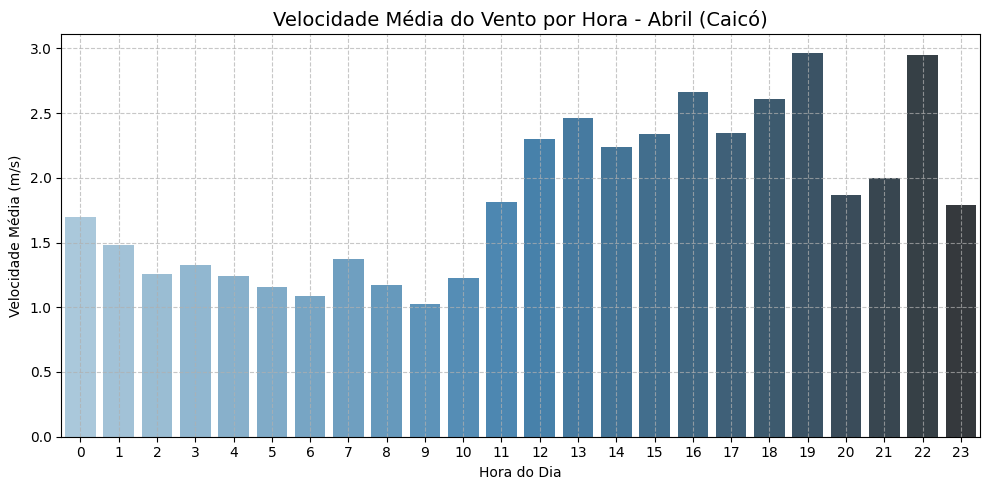

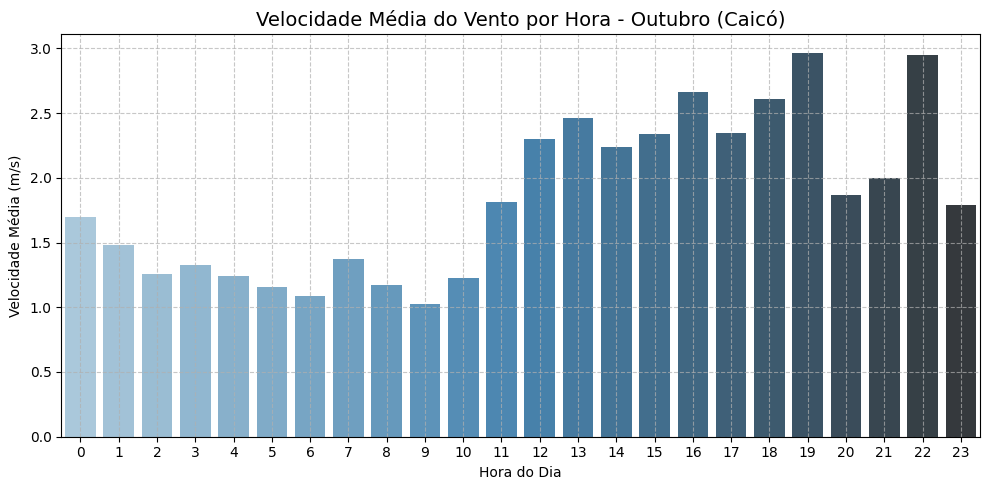

In [20]:
# Caminho para o arquivo CSV
caminho_arquivo3 = '/content/drive/MyDrive/eolica/2019/INMET_NE_RN_A316_CAICO_01-01-2018_A_31-12-2018.CSV'


# Leitura do arquivo
df3 = pd.read_csv(
                caminho_arquivo3,
                skiprows=8,
                encoding='latin1',
                sep=';',
                decimal=',',
                on_bad_lines='skip'
            )

df3.drop(columns=[col for col in colunas_remover if col in df3.columns], inplace=True)

# Padroniza e limpa os dados
if 'VENTO, VELOCIDADE HORARIA (m/s)' in df3.columns:
    df3.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
if 'DATA (YYYY-MM-DD)' in df3.columns:
    df3.rename(columns={'DATA (YYYY-MM-DD)': 'Data'}, inplace=True)

print(df3.head(20))


# Converte velocidade para número
df3['VELOCIDADE (m/s)'] = pd.to_numeric(df3['VELOCIDADE (m/s)'], errors='coerce')
df3 = df3[(df3['VELOCIDADE (m/s)'] >= 0) & (df3['VELOCIDADE (m/s)'] <= 40)]

# Substitui valores inválidos
df3.replace(['-9999', '-9999.0'], pd.NA, inplace=True)

# Converte a coluna 'Data' e 'Hora (UTC)' para datetime
df3['Data'] = pd.to_datetime(df3['Data'], errors='coerce')
df3['Data_Hora'] = pd.to_datetime(df3['HORA (UTC)'], errors='coerce')

# Extrai componentes da data e hora
df3['Ano'] = df3['Data'].dt.year
df3['Mês'] = df3['Data'].dt.month
df3['Dia'] = df3['Data'].dt.day
df3['Hora'] = df3['Data_Hora'].dt.hour

# Filtra apenas abril
df_caico_abril = df3[df3['Mês'] == 4]
df_caico_out = df3[df3['Mês'] == 10]

horas = pd.DataFrame({'Hora': list(range(24))})
media_abril_hora = df_caico_abril.groupby('Hora')['VELOCIDADE (m/s)'].mean().reset_index()
media_anov_hora = df_caico_out.groupby('Hora')['VELOCIDADE (m/s)'].mean().reset_index()

# Faz o merge para garantir que todas as 24 horas estejam presentes
media_abril_hora_completa = pd.merge(horas, media_abril_hora, on='Hora', how='left')
media_out_hora_completa = pd.merge(horas, media_abril_hora, on='Hora', how='left')

# Exibe o resultado
print(media_abril_hora_completa)

# Gráfico
# ABRIL
plt.figure(figsize=(10, 5))
sns.barplot(data=media_abril_hora_completa, x='Hora', y='VELOCIDADE (m/s)',
            palette='Blues_d')  # ou 'viridis', 'coolwarm', etc.
plt.title('Velocidade Média do Vento por Hora - Abril (Caicó)', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Velocidade Média (m/s)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# OUTUBRO
plt.figure(figsize=(10, 5))
sns.barplot(data=media_out_hora_completa, x='Hora', y='VELOCIDADE (m/s)',
            palette='Blues_d')  # ou 'viridis', 'coolwarm', etc.
plt.title('Velocidade Média do Vento por Hora - Outubro (Caicó)', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Velocidade Média (m/s)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tarefa 04

Cada aluno deve pegar uma localidade e dois anos diferentes e montar a tabela dedistribuição de frequência e o histograma das frequências.

Tabela de Frequência - 2015
           Classe  Frequência
0  (0.0907, 1.03]         398
1    (1.03, 1.96]        1228
2    (1.96, 2.89]        1783
3    (2.89, 3.82]        2261
4    (3.82, 4.75]        1371
5    (4.75, 5.68]         712
6    (5.68, 6.61]         249
7    (6.61, 7.54]          63
8    (7.54, 8.47]           7
9     (8.47, 9.4]           2


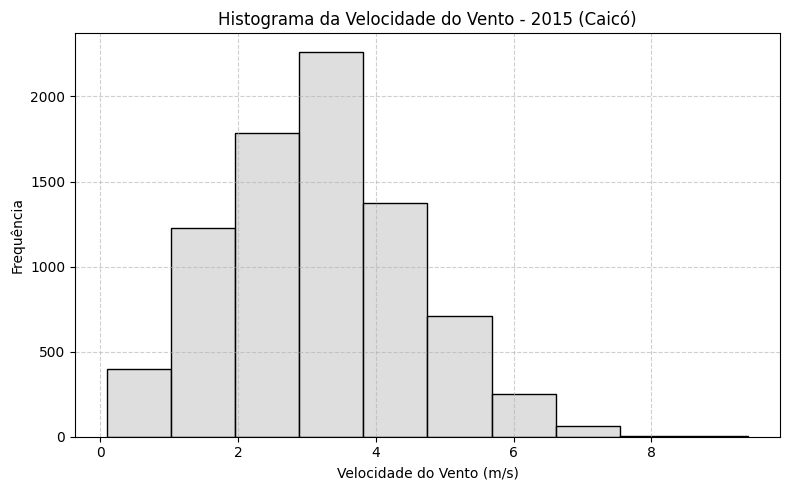

In [23]:
import numpy as np
#### IMPORTA DADOS ####
caminhos4 = {
    '2015': '/content/drive/MyDrive/eolica/caico/INMET_NE_RN_A316_CAICO_01-01-2015_A_31-12-2015.CSV',
    '2024': '/content/drive/MyDrive/eolica/caico/INMET_NE_RN_A316_CAICO_01-01-2024_A_31-12-2024.CSV'
}

# CRIA LISTA
dfs4 = {}

# RODA LOOP
for ano4, caminho4 in caminhos4.items():
    df4 = pd.read_csv(
                caminho4,
                skiprows=8,
                encoding='latin1',
                sep=';',
                decimal=',',
                on_bad_lines='skip'
            )
    df4 = df4.loc[:, ~df4.columns.duplicated()]
    df4.drop(columns=[col for col in colunas_remover if col in df4.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df4.columns:
      df4.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    # Substitui -9999 e outros valores inválidos
    df4['VELOCIDADE (m/s)'] = pd.to_numeric(df4['VELOCIDADE (m/s)'], errors='coerce')
    df4['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)

    df4['Ano'] = int(ano4)
    dfs4[ano4] = df4

#### CRIAÇÃO DA TABELA ####
ano_escolhido4 = '2015'
dados4 = dfs4[ano_escolhido4]['VELOCIDADE (m/s)'].dropna()

classes4 = pd.cut(dados4, bins=10)
frequencia4 = classes4.value_counts().sort_index()

# Tabela de frequência formatada
tabela_frequencia4 = pd.DataFrame({
    'Classe': frequencia4.index.astype(str),
    'Frequência': frequencia4.values
})

print(f"Tabela de Frequência - {ano_escolhido4}")
print(tabela_frequencia4)

# ---------- HISTOGRAMA ----------
plt.figure(figsize=(8, 5))
sns.histplot(dados4, bins=10, color='lightgray', edgecolor='black')
plt.title(f'Histograma da Velocidade do Vento - {ano_escolhido4} (Caicó)')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Tabela de Frequência - 2024
           Classe  Frequência
0  (0.0936, 0.74]         435
1    (0.74, 1.38]        1346
2    (1.38, 2.02]        1784
3    (2.02, 2.66]        1599
4     (2.66, 3.3]        1755
5     (3.3, 3.94]        1020
6    (3.94, 4.58]         536
7    (4.58, 5.22]         235
8    (5.22, 5.86]          52
9     (5.86, 6.5]          15


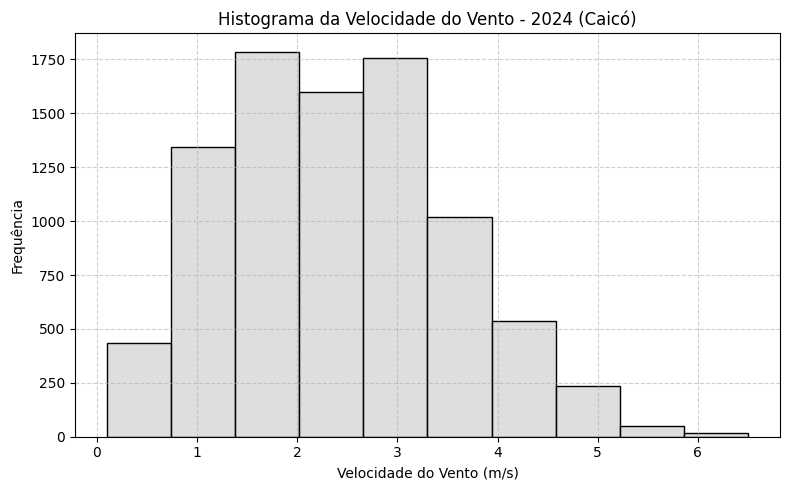

In [24]:

# CRIA LISTA
dfs42 = {}

# RODA LOOP
for ano42, caminho4 in caminhos4.items():
    df42 = pd.read_csv(
        caminho4,
        skiprows=8,
        encoding='latin1',
        sep=';',
        decimal=',',
        on_bad_lines='skip'
    )
    df42 = df42.loc[:, ~df42.columns.duplicated()]
    df42.drop(columns=[col for col in colunas_remover if col in df42.columns], inplace=True)

    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df42.columns:
        df42.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)

    # Substitui -9999 e outros valores inválidos
    df42['VELOCIDADE (m/s)'] = pd.to_numeric(df42['VELOCIDADE (m/s)'], errors='coerce')
    df42['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)

    df42['Ano'] = int(ano42)
    dfs42[ano42] = df42

#### CRIAÇÃO DA TABELA PARA 2017 ####
ano_escolhido42 = '2024'
dados42 = dfs42[ano_escolhido42]['VELOCIDADE (m/s)'].dropna()

classes42 = pd.cut(dados42, bins=10)
frequencia42 = classes42.value_counts().sort_index()

# Tabela de frequência formatada
tabela_frequencia42 = pd.DataFrame({
    'Classe': frequencia42.index.astype(str),
    'Frequência': frequencia42.values
})

print(f"Tabela de Frequência - {ano_escolhido42}")
print(tabela_frequencia42)

# ---------- HISTOGRAMA ----------
plt.figure(figsize=(8, 5))
sns.histplot(dados42, bins=10, color='lightgray', edgecolor='black')
plt.title(f'Histograma da Velocidade do Vento - {ano_escolhido42} (Caicó)')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
